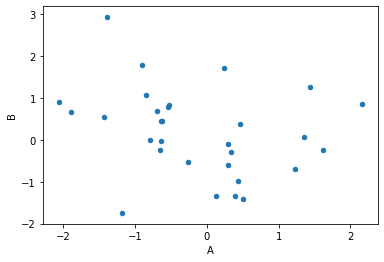

In [20]:
# https://medium.com/@anilbak69/5-python-pandas-tricks-to-make-data-analysis-7151b8fa0968
import pandas as pd



# part 1, generate and save the chart you'll use in the report
chart_fig = ("test_scatter.png")

df = pd.util.testing.makeDataFrame()

fig = df.plot(x='A', y='B', kind='scatter').get_figure()
fig.savefig(chart_fig)

    

In [65]:
# part 2: set up a page template with desired properties
import os

from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, PageBreak, Image
from reportlab.lib.styles import ParagraphStyle
from reportlab.rl_config import defaultPageSize
from reportlab.lib.units import inch

def page_template(canvas, doc):
    '''
    End Goal document:
        8.5 x 11" sheet
        1" margins all around
        Content on page:
            Justified paragraph describing the project
            Centered chart
            Another justified paragraph describing the chart
            Left-flushed footer with author's name and report title
            right-flushed footer with page number
    '''
    
    # save the current state before this function makes its changes state changes (e.g. change
    # font, line styles, etc.)
    canvas.saveState() 

    # define pg dimensions
    pg_height = 11 * inch
    pg_width = 8.5 * inch
    
    
# set up new doc object
out_pdf_name = "Pg_w_chart.pdf"
doc = SimpleDocTemplate(out_pdf_name)

Story = []

title_txt = "Example PDF Chart Report!"

# Paragraph(text, style, bulletText=None)
# alignment params: 0=left flush, 1=centered, 2=right flush
title_style = ParagraphStyle("Title", fontSize=18, spaceAfter=1 * inch, alignment=1)
title = Paragraph(title_txt, title_style)

Story.append(title)
# Story.append(Spacer(1, 1 * inch))

img_obj = Image(chart_fig)
Story.append(img_obj)

doc.build(Story, onFirstPage=page_template, onLaterPages=page_template)
print("created file {}".format(os.path.join(os.getcwd(), out_pdf_name)))
    

created file /Users/darrenconly/PythonProjects/CodeSnippets/MakePDFReport/Pg_w_chart.pdf


In [71]:
import reportlab
print(img_obj.hAlign)

CENTER
